# Semantically Segmenting Text Using Word Embeddings and Greedy Sequence Segmentation

This notebook illustrates how to use the text_segmentation_class in text_segmetnation.py to semantically segment a text document.The class converts a document's words into GloVe embeddings and uses the embedding information to semantically segment the document into k segmetns, where k is given.


In [1]:
%matplotlib inline

import spacy
import nltk
import os
from gensim.models import KeyedVectors
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import math
from scipy import spatial
import matplotlib.pyplot as plt
import mpld3

import text_segmentation as ts

# For interactive plots within the python notebook
mpld3.enable_notebook()

In [2]:
# the directory containing the Stanford GloVe model
# Change this to the proper path in your environment
glove_file = '/media/datadr/embeddings/glove.6B.100d.txt.word2vec'

# the document to be segmented
file_name="sample.txt"


In [3]:
# Instantiating the text segmetnation class object
seg_obj = ts.text_segmentation_class(file_name, glove_file)

#seg_boj.doc contains the text of the document to be segmented
print(seg_obj.doc)

Chemical reaction, a process in which one or more substances, the reactants, are converted to one or more different substances, the products. Substances are either chemical elements or compounds. A chemical reaction rearranges the constituent atoms of the reactants to create different substances as products.

Chemical reactions are an integral part of technology, of culture, and indeed of life itself. Burning fuels, smelting iron, making glass and pottery, brewing beer, and making wine and cheese are among many examples of activities incorporating chemical reactions that have been known and used for thousands of years. Chemical reactions abound in the geology of Earth, in the atmosphere and oceans, and in a vast array of complicated processes that occur in all living systems.

Chemical reactions must be distinguished from physical changes. Physical changes include changes of state, such as ice melting to water and water evaporating to vapour. If a physical change occurs, the physical p

In [5]:
# Find best segmentation boundaries to create n segments, for a given k
k=3

# Segment text into k segments using the greedy method
seg_obj.greedy_text_segmentation(k);

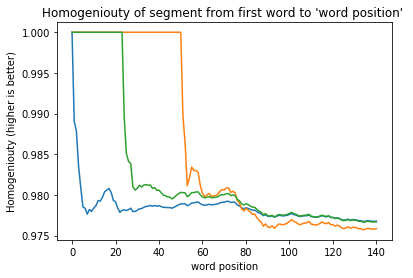

In [6]:
# type
# for each segment S from a word i to another word j in the document, 
# we measure D the average distance of each word in the segment from the segment's centroid
# The smaller that distance, the more homogeneneous the segment
# therefor, homogeniouty can be defined as 1-D
#
# Here we plot the homegeniouty of segments from the first word to each subsequent word in the text.

plt.plot(1-seg_obj.avg_dist[0,:])
plt.ylabel('Homogeniouty (higher is better)')
plt.xlabel('word position')
plt.title('Homogeniouty of segment from first word to \'word position\' ')
plt.plot(1-seg_obj.avg_dist[50,:])
plt.plot(1-seg_obj.avg_dist[23,:])
plt.show()

In [7]:
segments= seg_obj.get_segment_texts()

In [8]:
for i, seg in enumerate(segments):
    print("segment {}:\n{}\n====".format(i+1, seg))

segment 1:
Chemical reaction , a process in which one or more substances , the reactants , are converted to one or more different substances , the products . Substances are either chemical elements or compounds . A chemical reaction rearranges the constituent atoms of the reactants to create different substances as products . Chemical reactions are an integral part of technology , of culture , and indeed of life itself . Burning fuels , smelting iron , making glass and pottery , brewing beer , and making wine and cheese are among many examples of activities incorporating chemical reactions that have been known and used for thousands of years . Chemical reactions abound in the geology of Earth , in the atmosphere and oceans , and in a vast array of complicated processes that occur in all living systems . Chemical reactions
====
segment 2:
must be distinguished from physical changes . Physical changes include changes of state , such as ice melting to water and water evaporating to vapour